In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform


from sklearn.linear_model import LinearRegression
import xgboost as xgb


from sklearn.metrics import r2_score

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv') # Does not include target column
og_data = pd.read_csv('data/flood.csv')

## EDA

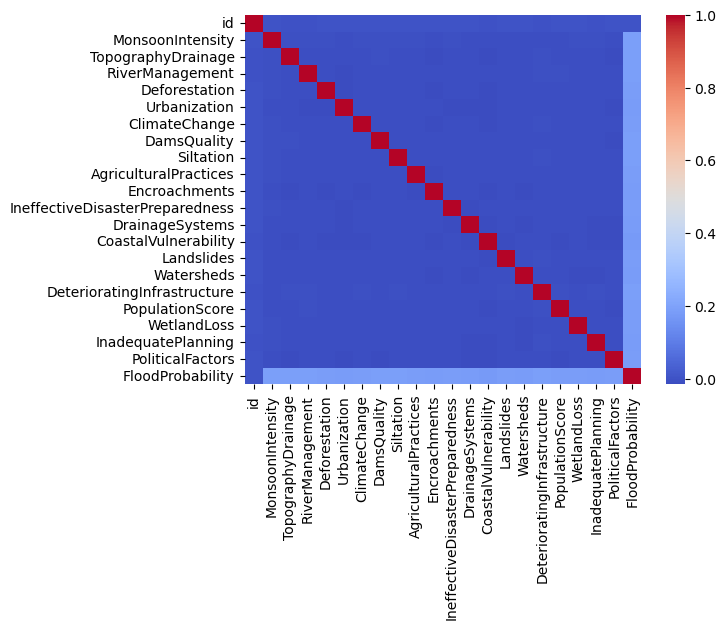

In [3]:
train_correlation_matrix = train_data.corr()
sns.heatmap(train_correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

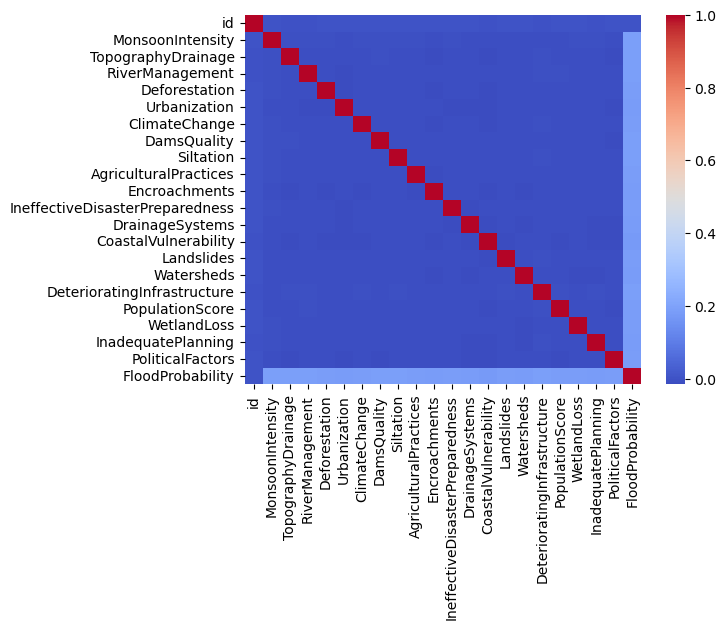

In [4]:
og_correlation_matrix = og_data.corr()
sns.heatmap(train_correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

In [5]:
# Generate a column profile
def column_profile(df):
    profile = pd.DataFrame({
        'dtype': df.dtypes,
        'min': df.min(),
        'max': df.max(),
        'distinct_values': df.nunique(),
        'missing_values': df.isnull().sum(),
        'mean': df.mean()
    })
    return profile

In [6]:
train_profile = column_profile(train_data)
og_profile = column_profile(og_data)

In [7]:
train_profile

,dtype,min,max,distinct_values,missing_values,mean
id,int64,0.000,1117956.000,1117957,0,558978.000000
MonsoonIntensity,int64,0.000,16.000,17,0,4.921450
TopographyDrainage,int64,0.000,18.000,19,0,4.926671
RiverManagement,int64,0.000,16.000,17,0,4.955322
Deforestation,int64,0.000,17.000,18,0,4.942240
Urbanization,int64,0.000,17.000,18,0,4.942517
ClimateChange,int64,0.000,17.000,18,0,4.934093
DamsQuality,int64,0.000,16.000,17,0,4.955878
Siltation,int64,0.000,16.000,17,0,4.927791
AgriculturalPractices,int64,0.000,16.000,17,0,4.942619


## Transformation

In [8]:
target = 'FloodProbability'

X = train_data.drop(columns=[target])
y = train_data[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=23)

In [9]:
X_train.shape, y_train.shape

((894365, 21), (894365,))

In [10]:
# Define a pipeline for simple scaling
scale_pipe = Pipeline([
    ('scaler', StandardScaler())
])

In [11]:
X_train

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
880146,880146,4,5,4,6,6,4,5,5,3,...,4,3,6,5,0,1,5,4,9,5
1055262,1055262,3,3,7,3,5,6,5,3,8,...,5,5,5,6,5,5,6,5,4,8
751562,751562,7,7,3,7,5,4,5,4,5,...,8,5,3,8,2,8,3,4,6,5
462313,462313,11,5,7,4,8,3,8,5,6,...,7,4,6,5,6,2,5,3,4,2
832659,832659,2,6,1,4,8,4,2,2,4,...,4,3,4,4,5,4,5,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764141,764141,6,2,6,7,5,1,4,3,1,...,1,5,8,4,5,9,2,7,5,9
727071,727071,4,2,4,3,4,5,5,5,9,...,6,5,5,6,7,3,4,3,4,4
795688,795688,6,6,8,6,4,6,9,7,6,...,5,7,4,6,8,6,5,6,3,9
652006,652006,5,4,5,3,7,6,5,8,5,...,3,4,4,5,5,6,6,2,3,5


In [12]:
scale_pipe.fit(X_train.drop(columns=['id'])) #id is not needed, automatic indexing will work the same

# Step 1: Separate the 'id' column
train_id_column = X_train['id']
test_id_column = X_test['id']

# Step 2: Scale the other columns
X_train_scaled = scale_pipe.transform(X_train.drop(columns=['id']))
X_test_scaled = scale_pipe.transform(X_test.drop(columns=['id']))


# Step 3: Create a new DataFrame with the scaled features
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns[1:])

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns[1:])

submission_ids = test_data['id']
submission_features_scaled = scale_pipe.transform(test_data.drop(columns=['id'])) 
submission_features_scaled_df = pd.DataFrame(submission_features_scaled, columns=X_train.drop(columns=['id']).columns)
submission_features_scaled_df['id'] = submission_ids


In [ ]:

train_df_full = X_train_scaled_df.assign(target = y_train.values)
test_df_full = X_test_scaled_df.assign(target = y_test.values)

train_df_full.to_csv('./data/train_transformed_full.csv', index=False)
test_df_full.to_csv('./data/test_transformed_full.csv', index=False)

submission_features_scaled_df.to_csv('./data/submission_features.csv', index=False)

## Model Testing

In [14]:
def eval_r2(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    # Evaluate the model
    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)
    # Calculate residuals
    
    train_residuals = y_train - train_preds
    test_residuals = y_test - test_preds

    print(f"Train R² Score: {train_r2}")
    print(f"Test R² Score: {test_r2}")
    
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=train_preds, y=train_residuals, alpha=0.6)
    plt.axhline(0, color='r', linestyle='--')
    plt.title('Train Residuals')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=test_preds, y=test_residuals, alpha=0.6)
    plt.axhline(0, color='r', linestyle='--')
    plt.title('Test Residuals')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

    plt.tight_layout()
    plt.show()
    return

### Linear Regression

Train R² Score: 0.844763433121807
Test R² Score: 0.8456890580243805


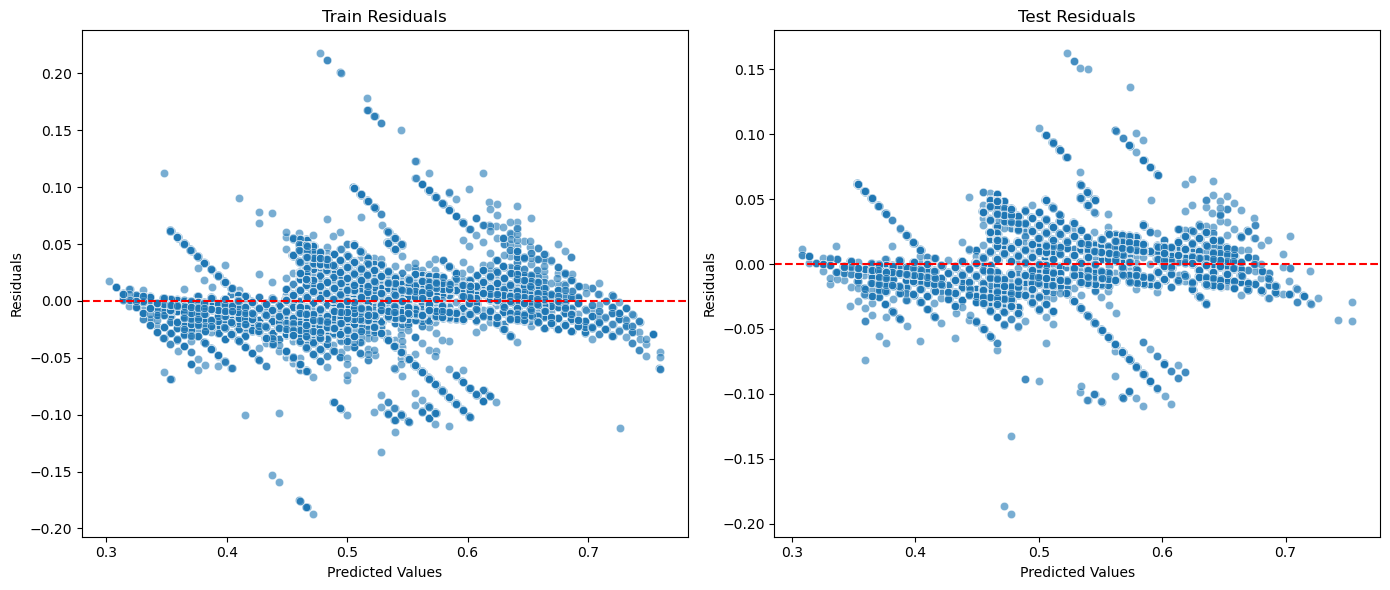

In [15]:
linreg_model = LinearRegression()
eval_r2(model=linreg_model,
        X_train=X_train_scaled,
        X_test=X_test_scaled,
        y_train=y_train,
        y_test=y_test, 
        )

### XGBoost

In [16]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

xgb_model = xgb.XGBRegressor()

eval_r2(model=xgb_model,
        X_train=X_train_scaled,
        X_test=X_test_scaled,
        y_train=y_train,
        y_test=y_test, 
        )

: 

In [ ]:
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])

In [ ]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 4, 5]
}

In [ ]:
# Set up the random search with 5-fold cross validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=3,  # Number of parameter settings sampled
    scoring='r2',  # Evaluation metric
    cv=5,  # 5-fold cross validation
    verbose=1,
    random_state=23,
    n_jobs=-1  # Use all available cores
)

# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=23, scoring='r2', verbose=1)

In [ ]:
# Print the best parameters and the corresponding score
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best R2 found: {(random_search.best_score_)}")

# Predict on the test set using the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
print(f"Test set R2: {r2}")

Best parameters found: {'subsample': 0.7, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best R2 found: 0.8322113705859226
Test set R2: 0.8340433086553782
